# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')  
data.head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

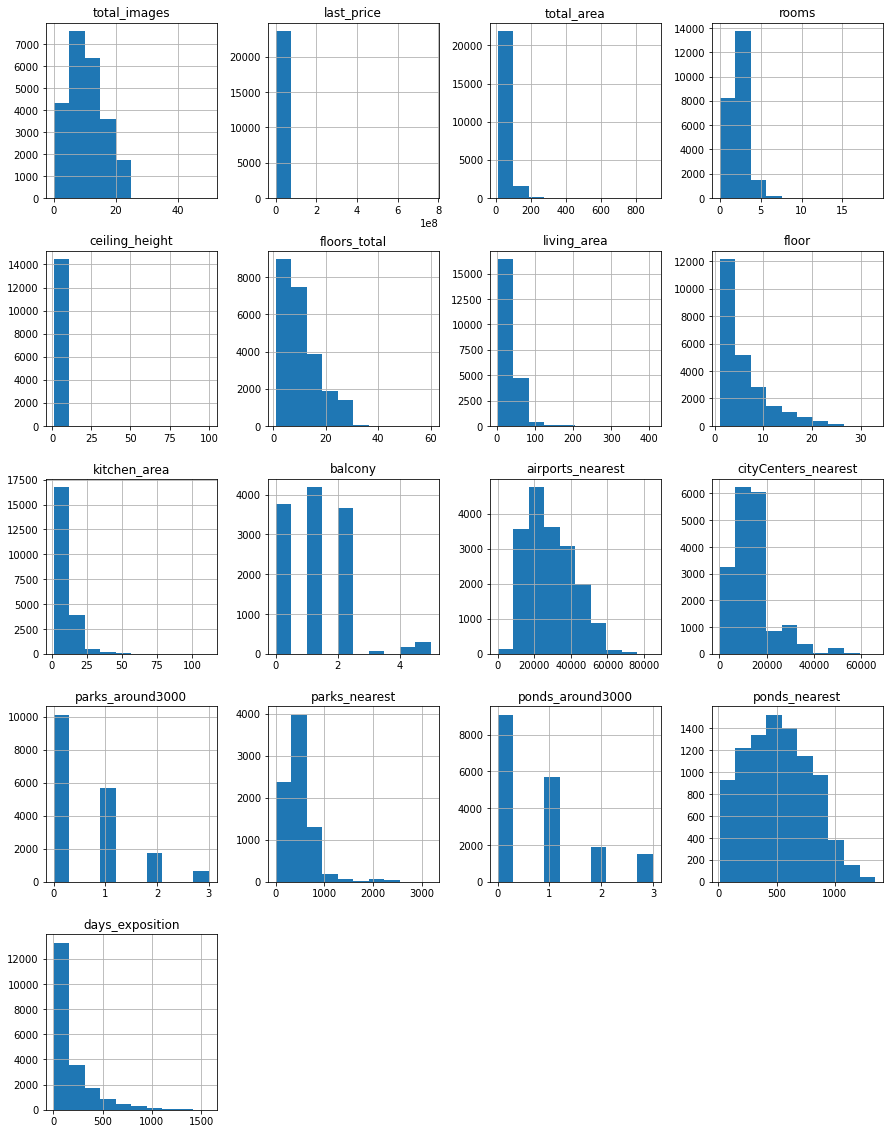

In [3]:
data.hist(figsize=(15, 20))

### Предобработка данных

In [4]:
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок ', 'посёлок городского типа ')
data['locality_name'] = data['locality_name'].str.replace('посёлок ', '')
data['locality_name'] = data['locality_name'].str.replace('деревня ', '')
data['locality_name'] = data['locality_name'].str.replace('городского типа ', '')
data['locality_name'] = data['locality_name'].str.replace('село ', '')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('коттеджный ', '')
data['locality_name'] = data['locality_name'].str.replace('станции ', '')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной ', '')
data['locality_name'] = data['locality_name'].str.replace('имени ', '')
data['locality_name'] = data.locality_name.str.lower()
                    

обработка дубликатов, удаляем связки слов, некорректные названия, нижний регистр


In [5]:
data['balcony'] = data['balcony'].fillna(0)


сотрудники, заполняя, оставили пропуски  в поле "балконов" - производим замену на 0. (балкона нет)

In [6]:
selected_data_for_ceiling_height = data.query('1 < rooms < 3 and last_price < 4500000 and floor < 5')
ceiling_height_avg = selected_data_for_ceiling_height['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_avg)
data = data.query('2.4 < ceiling_height < 4')




 Данные которые заносились системой автоматически (картографические параметры) отсутствуют, скорее всего, по причине того, что система не могла сопоставить введённые данные пользователем и найти у себя в базе этот объект для расчета расстояний и положения относительно центра, парков и т.д. Эти пропуски оставляем не заполненными.
  Удалены позиции с  аномально высокими и низкими потолками, их менее 1%, на расчет влияют минимально. Заполнять медианными значениями нет необходимости, так как это может не соответствовать фактической высоте в конкретных помещениях.Видимо была возможность заносить данные без заполнения и оставлять пропуск, при чем во всех полях. 

In [7]:
data['last_price'] = data['last_price'].astype('Int64')
data['floors_total'] = data['floors_total'].astype('Int64')
data['balcony'] = data['balcony'].astype('Int64')
data['days_exposition'] = data['days_exposition'].fillna(0).astype(int)

В  last_price, floors_total и balcony заменяем дробные значения на целочисленные. В столбце days_exposition пропущенные значения заменяем на 0.

В процессе предобработки предоставленных данных были выявлены и обработанны для последуещего анализа следующие параметры:
    название столбцов были выведены к подходящему для работы виду и содержанию
    выявлены и удалены значения аномально высоких и низких потолков, исключаем дополнительное искожение статистики
    пропуски с кол-вом балконов заменены на 0.
    


```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

### Посчитайте и добавьте в таблицу новые столбцы

In [8]:
data['cost_of_square_meter'] = data['last_price'] / data['total_area']
data['cost_of_square_meter'] = data['cost_of_square_meter'].astype('Int64')
#data.head()

Создан столбец cost_of_square_meter. В нем расчет стоимости одного кв. метра

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['publication_day'] = data['first_day_exposition'].dt.day_name()
def publication(income):
    if income == 'Monday':
        return 'понедельник'
    elif income == 'Tuesday':
        return 'вторник'
    elif income == 'Wednesday':
        return 'середина'
    elif income == 'Thursday':
        return 'четверг'
    elif income == 'Friday':
        return 'пятница' 
    elif income == 'Saturday':
        return 'суббота'        
    elif income == 'Sunday':
        return 'воскресенье'
data['publication_day'] = data['publication_day'].apply(publication)

data['publication_month'] = data['first_day_exposition'].dt.month_name()
data['publication_year'] = data['first_day_exposition'].dt.year

def floors(income):
    if income == 1:
        return 'первый'
    else:
        return 'другой'
data['floor_type'] = data['floor'].apply(floors)
data['last'] = data['floor'] - data['floors_total']
data.loc[data['last'] == 0, 'floor_type'] = 'последний'
del data[data.columns[-1]]
#data.head(20)

Добавлен столбец с днями, месяцами и годами публикации объявления. Коррекция формата даты. Добавлена колонка с кларификацией расположения объекта недвижимости по этажам: первый, последний и другое.

In [10]:
data['cityCenters_nearest_(km)'] = data['cityCenters_nearest'] // 1000
#data.head()

Добавлен столбец в км.

### Проведите исследовательский анализ данных

Text(0.5, 1.0, 'Зависимость стоимости от общей площади')

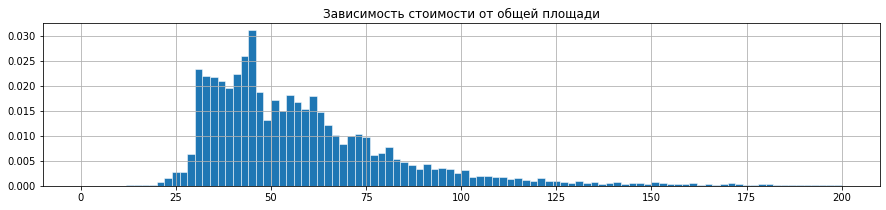

In [11]:

data.hist(['total_area'], bins= 100, range=(0, 200), density = True, figsize=(15, 3), linewidth=0.5, edgecolor="white")
plt.title('Зависимость стоимости от общей площади')
 

Гистограмма показывает - примерно от 30 до 60 кв.м - это наибольшее кол-во квартир.

Text(0.5, 1.0, 'Зависимость стоимости от жилой площади')

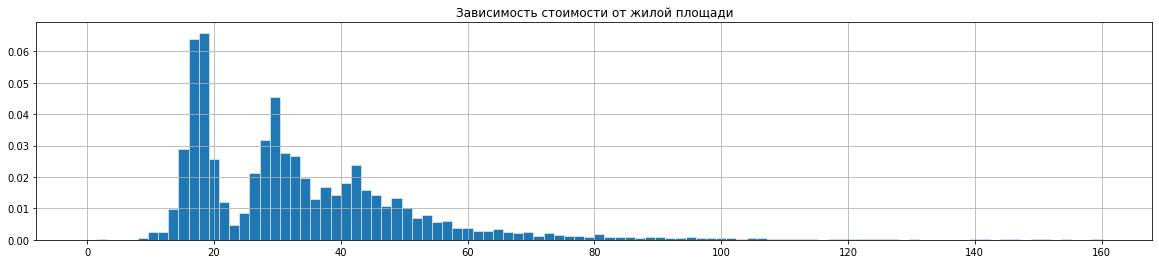

In [12]:
data.hist(['living_area'], bins=100, range=(0, 160), density = True, figsize=(20, 4), linewidth=0.5, edgecolor="white")
plt.title('Зависимость стоимости от жилой площади')

Жилая площадь около 17  и 27 м.кв. - наиболее распространена

Text(0.5, 1.0, 'Площади кухни')

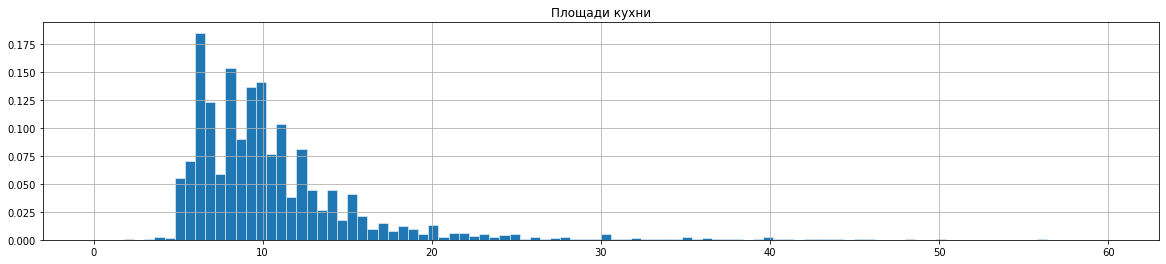

In [13]:
data.hist(['kitchen_area'], bins=100, range=(0, 60), density = True, figsize=(20, 4), linewidth=0.5, edgecolor="white")
plt.title('Площади кухни')

Скачкообразно, но площадь кухонь от 5 до 13 кв.м.

Text(0.5, 1.0, 'Стоимости')

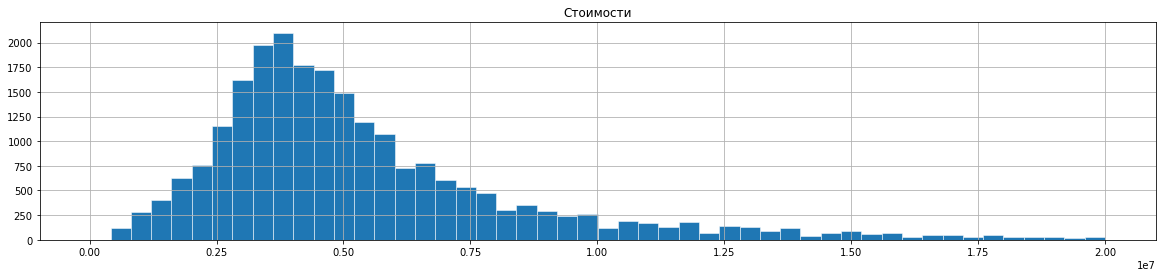

In [14]:
data_correct = data.query('last_price < 20000000')
data_correct.hist(['last_price'], bins=50, figsize=(20, 4), linewidth=0.5, edgecolor="white")
plt.title('Стоимости')

Диапазон стоимостей наиболее востребованых квартир составляет от 2.5 млн до 6 млн. 

Text(0.5, 1.0, 'Количество комнат')

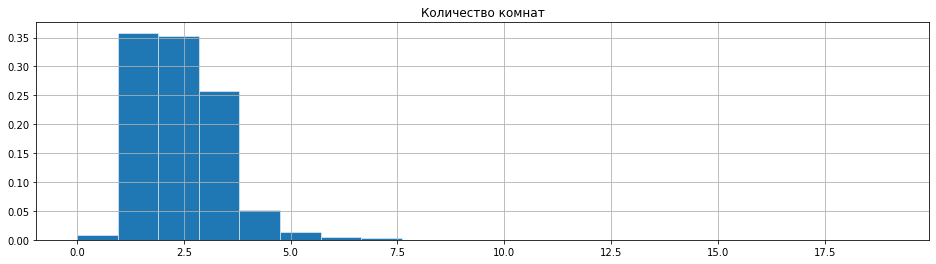

In [15]:
data.hist(['rooms'], bins=20, figsize=(16, 4), density = True, linewidth=0.5, edgecolor="white")
plt.title('Количество комнат')

Предложений по рынку с более чем 4 комнатами значительно меньше, основной рынок от 1 до 4 комнатные.

Text(0.5, 1.0, 'Высоты потолков')

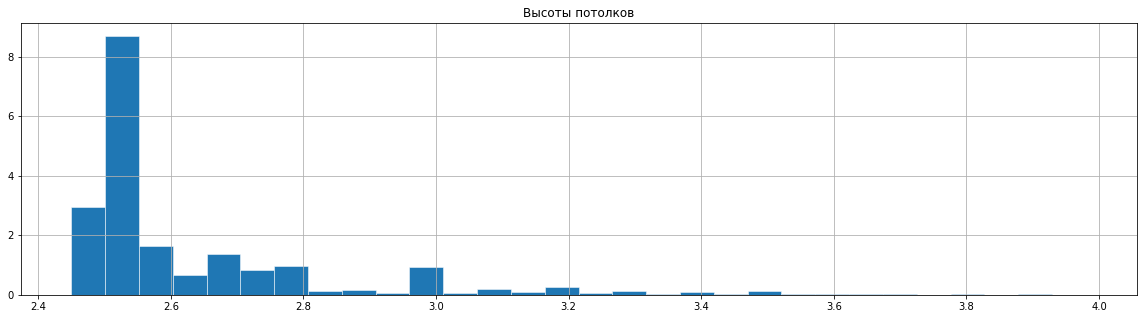

In [16]:
data.hist(['ceiling_height'], bins=30, figsize=(20, 5), density = True, linewidth=0.5, edgecolor="white")
plt.title('Высоты потолков')

После "предобработки" потолки, в подавляющем большинстве от 2.5 до 2.8 м. Есть часть около 3-х метровых.

Text(0.5, 1.0, 'Этажи')

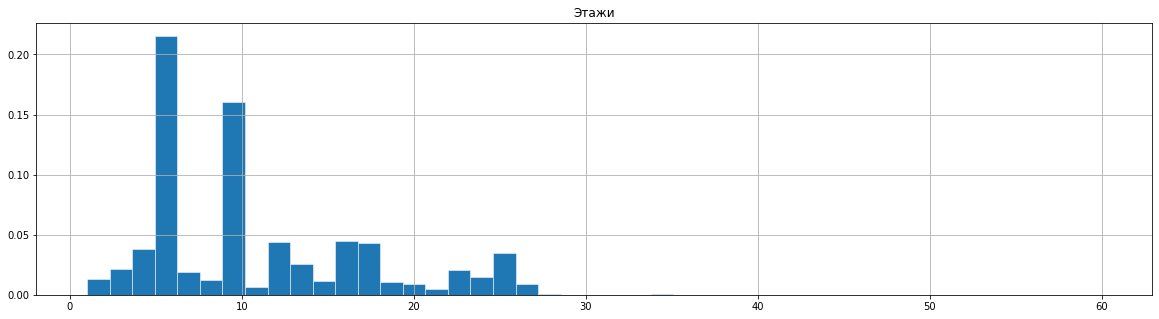

In [17]:
data.hist(['floors_total'], bins=45, figsize=(20, 5), density = True, linewidth=0.5, edgecolor="white")
plt.title('Этажи')

Самые популярные пятый и девятые этажи, т.к. такие дома - самые распространенные.

Text(0.5, 1.0, 'Последнийи и первый этажи')

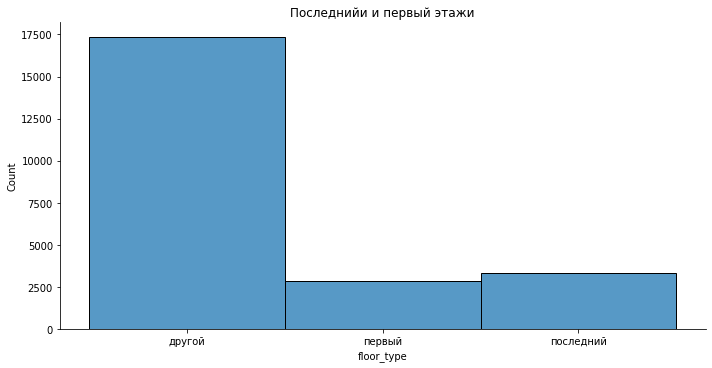

In [18]:
sns.displot(x='floor_type', height=5, aspect=2, data=data)
plt.title('Последнийи и первый этажи')

Часть первых  и последних этажей - примерно одинаковая. остальные - другие этажи.

Text(0.5, 1.0, 'Расстояние от центра города до объекта')

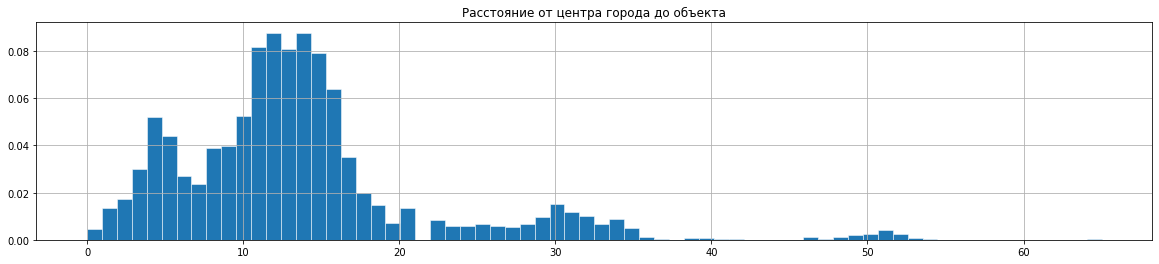

In [19]:
data.hist(['cityCenters_nearest_(km)'], bins=68, figsize=(20, 4), density = True, linewidth=0.5, edgecolor="white")
plt.title('Расстояние от центра города до объекта')

От 12 до 17 км - это расстояние у большинства объектов. Так же значительно кол-во от 4 до 6 км.

Text(0.5, 1.0, 'Расстояние от аэропорта до объекта')

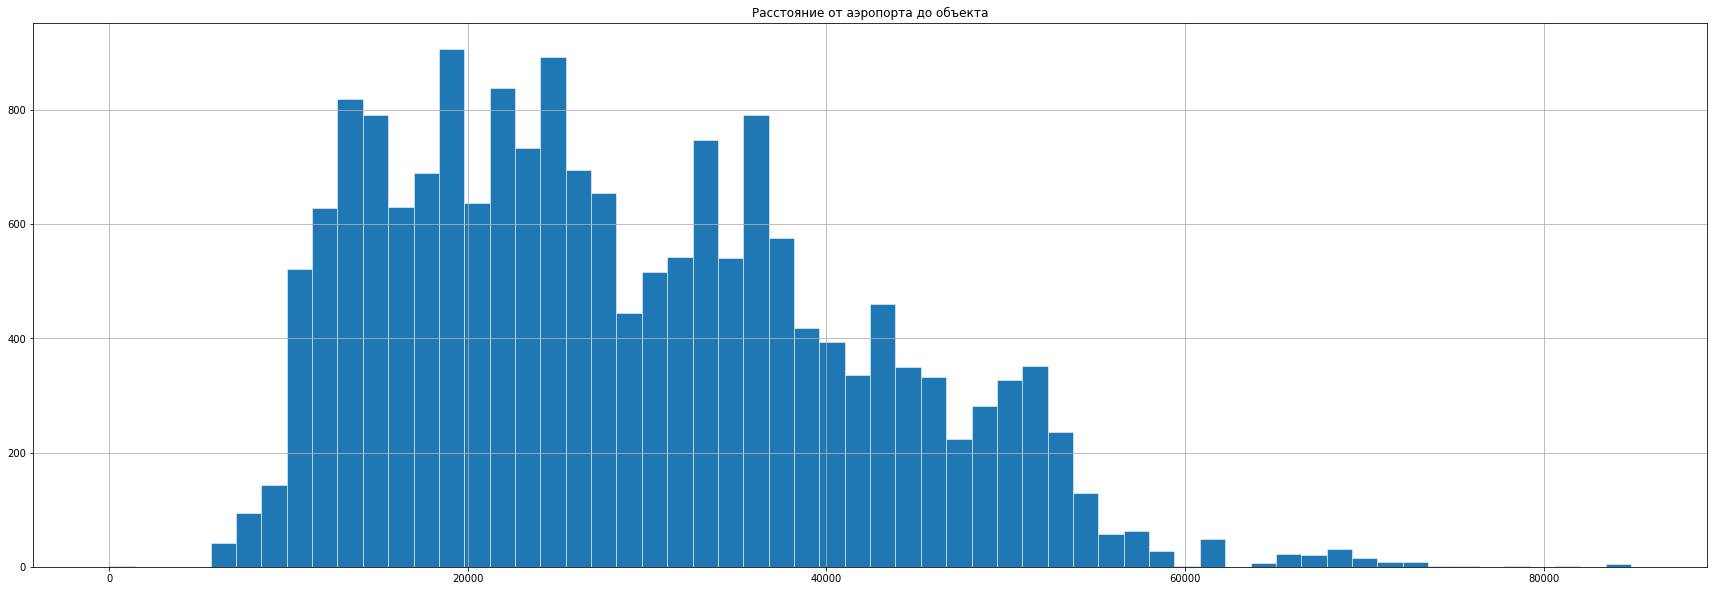

In [20]:
data.hist(['airports_nearest'], bins=60, figsize=(30, 10), linewidth=0.5, edgecolor="white")
plt.title('Расстояние от аэропорта до объекта')

Удаление от аэропорта у большинтсва квартир это - от 15 до 27 км. от районов зависит, волнообразно.в районе 35 км так же всплески.

Text(0.5, 1.0, 'Расстояние от парков города до объекта')

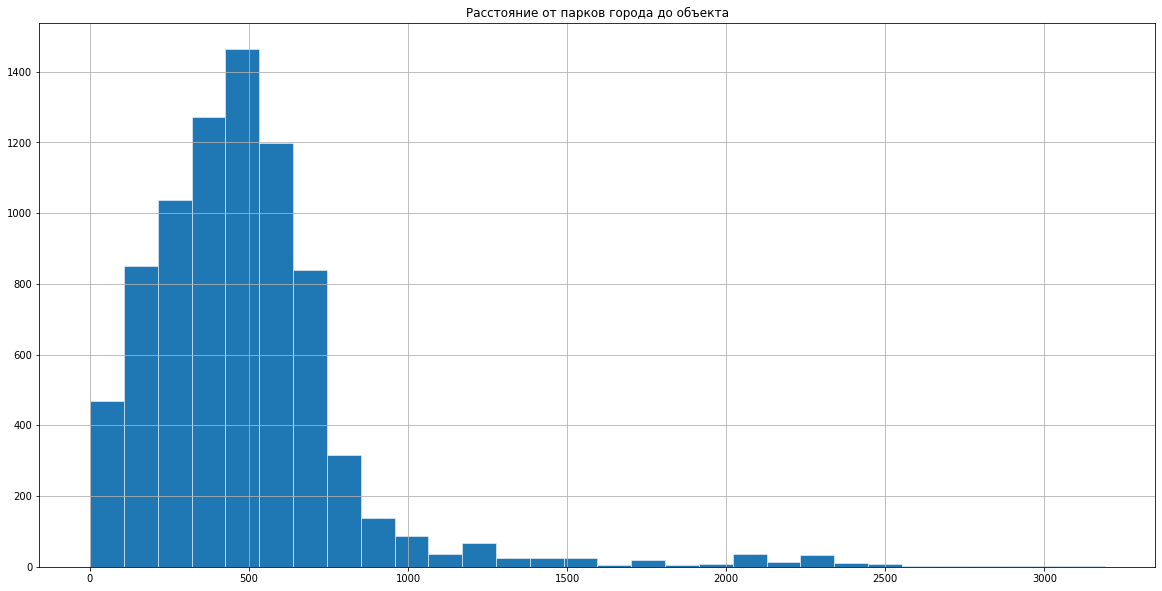

In [21]:
data.hist(['parks_nearest'], bins=30, figsize=(20, 10), linewidth=0.5, edgecolor="white")
plt.title('Расстояние от парков города до объекта')

О наличии парков есть информация, примерно, у 30 процентов предлождений. У большинства из них  расстояния  от 400 до 700 м. Остальные предложения могут не иметь информации по разным причинам, вследствии которых данные не вносились.

Text(0.5, 1.0, 'Подача объявлений по дням недели')

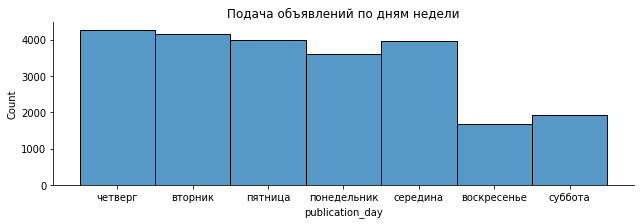

In [22]:
sns.displot(x='publication_day', height=3, aspect=3, data=data)
plt.title('Подача объявлений по дням недели')


Работа по подаче объявления -тоже работа. в 2 раза больше поданных объявлений в выходные дни.

Text(0.5, 1.0, 'Подача объявлений по месяцам')

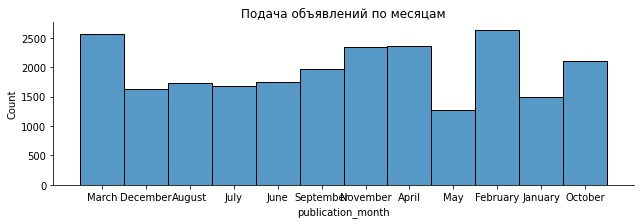

In [23]:
sns.displot(x='publication_month', height=3, aspect=3, data=data)
plt.title('Подача объявлений по месяцам')

Конец зимы, начало весны - наиболее популярное время размещения. Ноябрь и октябрь так же незначительно превосходит над остальными.

Text(0.5, 1.0, 'Подача объявлений по дням недели')

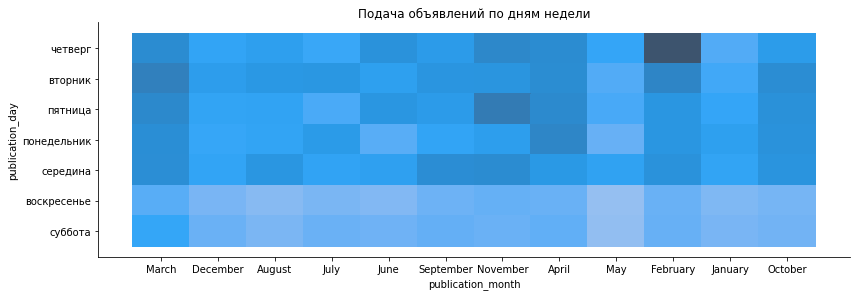

In [39]:
sns.displot(x='publication_month',  y='publication_day', height=4, aspect=3, data=data)
plt.title('Подача объявлений по дням недели')

вторник и четверг в марте, так  же в апреле  и марте - дни наибольших публикаций.

In [25]:
data.days_exposition.describe()

count    23541.000000
mean       156.444841
std        213.322616
min          0.000000
25%         22.000000
50%         74.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее количество дней размещено объявление: 156.44484091584894
Медианное количество дней размещено объявление: 74.0


Text(0.5, 1.0, 'Сроки продажи и снятия объявлений')

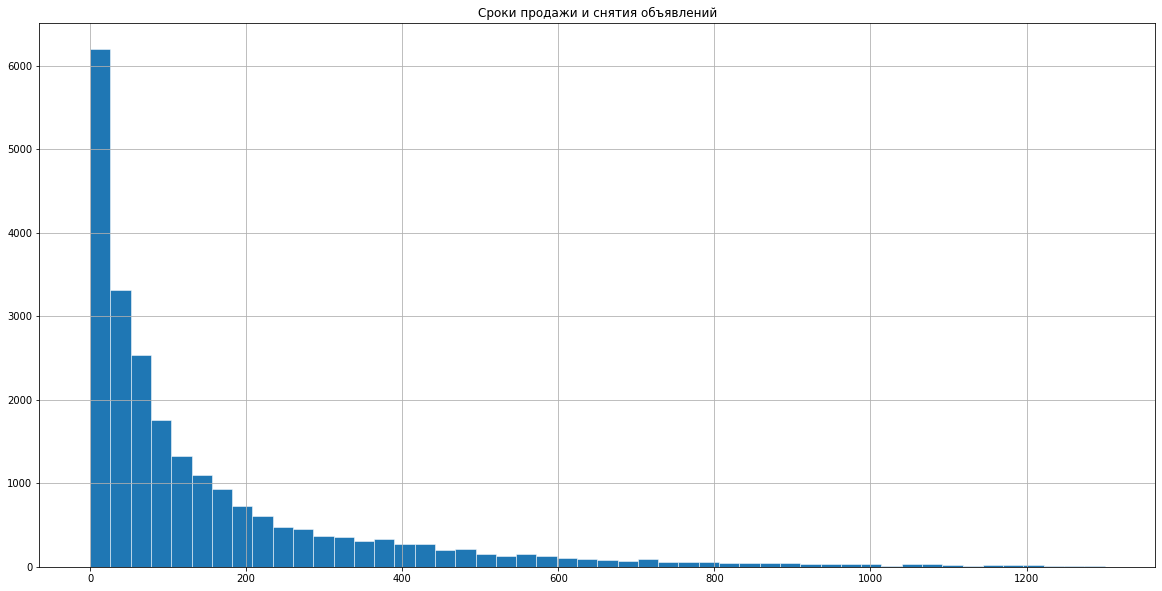

In [40]:
mean_ = data.days_exposition.mean()
print('Среднее количество дней размещено объявление:',mean_)
median_ = data.days_exposition.median()
print('Медианное количество дней размещено объявление:', median_)


data['days_exposition'].hist(bins=50, figsize=(20, 10), linewidth=0.5, edgecolor="white", range=(0, 1300))
plt.title('Сроки продажи и снятия объявлений')

По диаграмме размаха заметно распределение Пуассона. Сроки продажи и снятия объявления упримерно 180 дней. Далее снижается кол-во обявлений достаточно плавно. После двух лет - вовсе случаи близки к единичным 

Коэффициент корреляции равен: 0.6443724996164714


Text(0.5, 1.0, 'Корреляция стоимости от общей площади')

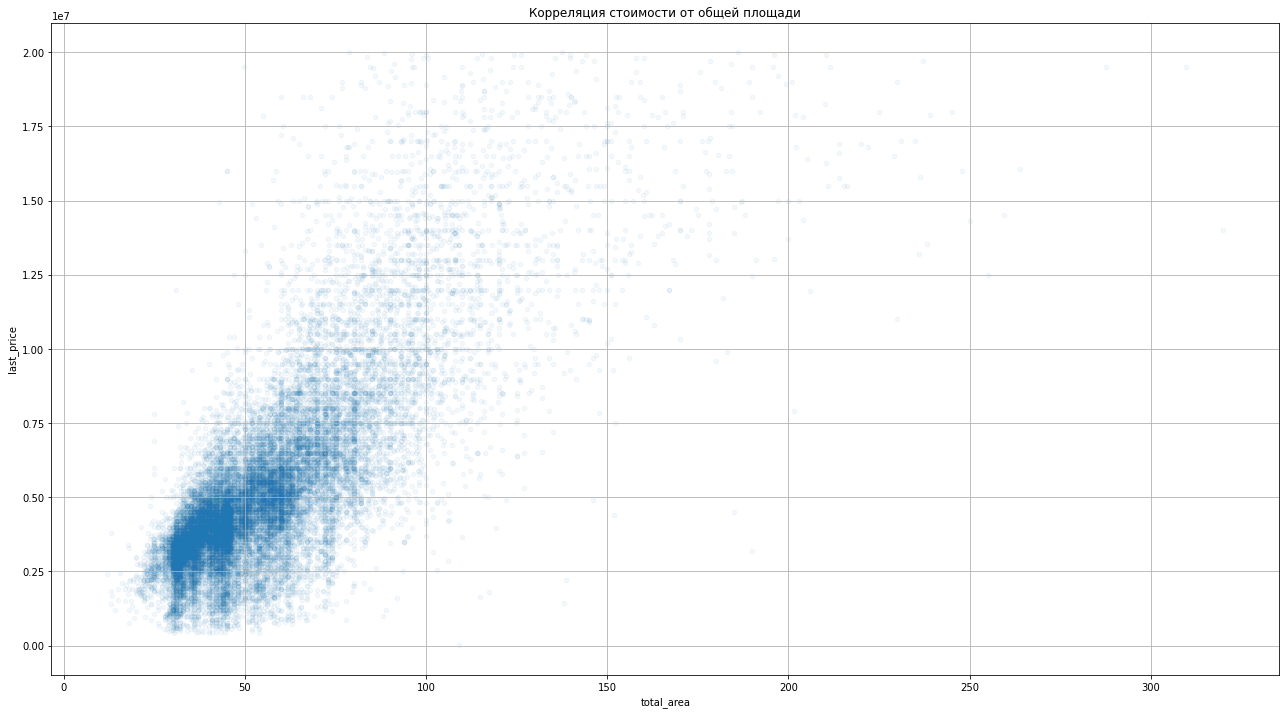

In [42]:
data_total_area_for_scale = data.query('total_area < 200')
data_total_area_for_scale = data.query('last_price < 20000000')
data_total_area_for_scale.plot(x='total_area', y='last_price', kind='scatter', alpha=0.05, grid=True, figsize=(22, 12))


corr = data.corr()
corr = corr.reset_index()

print('Коэффициент корреляции равен:', corr.iloc[2]['last_price'])
plt.title('Корреляция стоимости от общей площади')

Линейная зависимость стоимости от площади больше в зоне стоимости 7 млн и 80 кв. м. Далее зависимость ослабевает.

Коэффициент корреляции равен: 0.552681305447273


Text(0.5, 1.0, 'Корреляция стоимости от жилой площади')

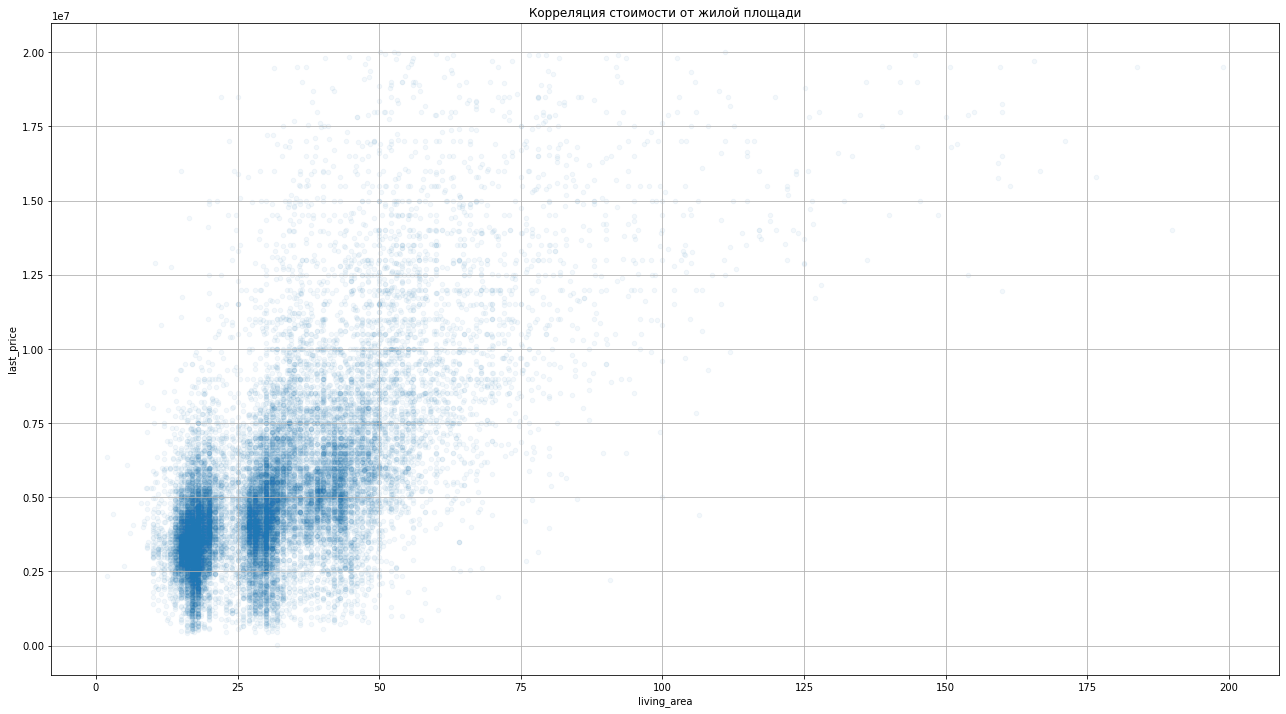

In [43]:
data_liv = data.query('living_area < 150')
data_liv = data.query('last_price < 20000000')
data_liv.plot(x='living_area', y='last_price', kind='scatter', alpha=0.05, grid=True, figsize=(22, 12))

print('Коэффициент корреляции равен:', corr.iloc[6]['last_price'])
plt.title('Корреляция стоимости от жилой площади')

Зависимость по жилой площади более развита местами - в районге 16 кв.м и 26 кв.м  менее разита, по остальным коэфециент корреляции смещается гораздо ниже 0.55

Коэффициент корреляции: 0.5112875864499972


Text(0.5, 1.0, 'Корреляция стоимости от площади кухни')

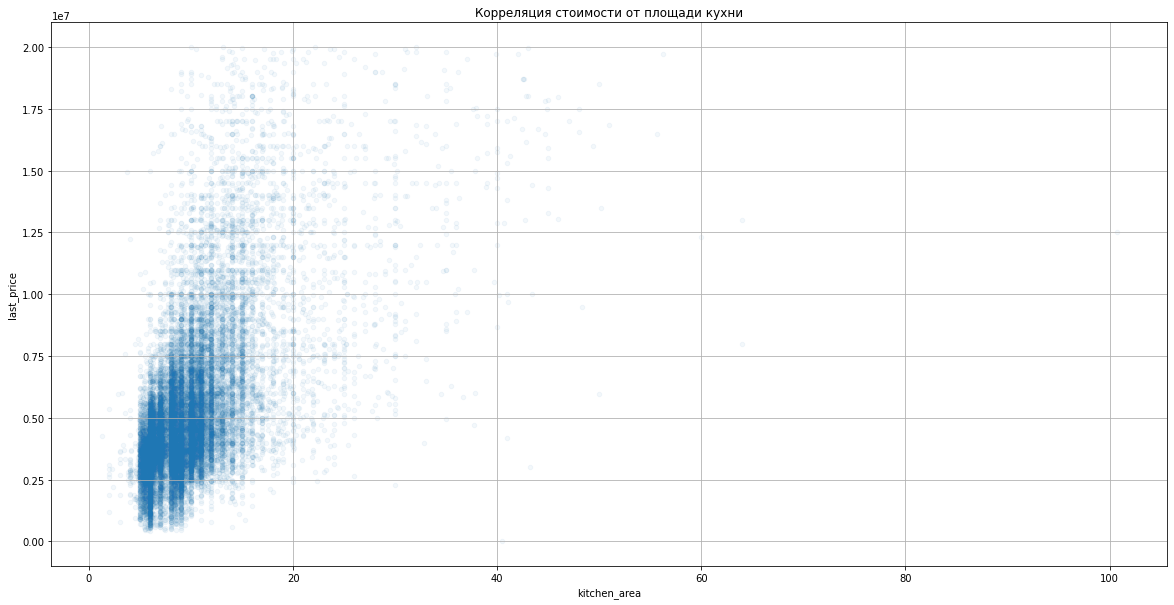

In [44]:
kitchen = data.query('kitchen_area < 200')
kitchen = data.query('last_price < 20000000')
kitchen.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.05, grid=True, figsize=(20, 10))

print('Коэффициент корреляции:', corr.iloc[10]['last_price'])
plt.title('Корреляция стоимости от площади кухни')

Зависимотсь по значению площади кухни к стоимости еще ниже, чем в предыдущих, но она есть

,rooms,last_price_mill
0,0,2.7
1,1,3.6
2,2,4.752981
3,3,6.15
4,4,8.855


Коэффициент корреляции равен: 0.35707058479866893


Text(0.5, 1.0, 'Корреляция стоимости от количества комнат')

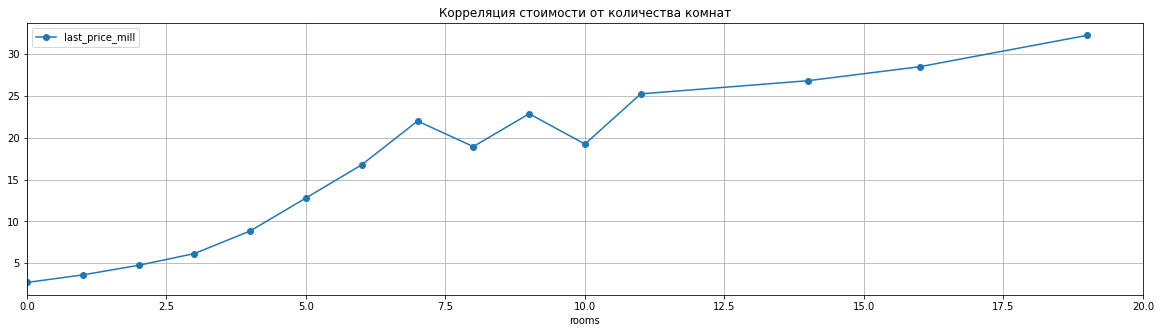

In [45]:
rooms = data.query('rooms < 20')
rooms = rooms.query('last_price < 40000000')
rooms['last_price_mill'] = rooms['last_price'] / 1000000

rooms_pivot = rooms.pivot_table(index='rooms', values='last_price_mill', aggfunc='median').reset_index()
display(rooms_pivot.head())
rooms_pivot.plot(x='rooms', y='last_price_mill', style='o-', xlim=(0, 20),  grid=True, figsize=(20, 5))


corr = data.corr()
print('Коэффициент корреляции равен:', corr.iloc[3]['last_price'])
plt.title('Корреляция стоимости от количества комнат')

Корреляция у квартир с более 7 комнатами падает! Общий коэф. к равен 0.35. Зависиость кол-ва комнат от цены есть. Основные для статистики квартиры от 1 до 4 комнат, но остальные хоть и имеют по нисходящей меньшее кол-во квартир для статистики, все равно при этом до 7 комнат зависимость  остается выше.

/tmp/ipykernel_48/1862641454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floor['last_price_mill'] = floor['last_price'] / 1000000


,floor_type,last_price_mill
0,другой,4.8
1,первый,3.9
2,последний,4.2875


Text(0.5, 1.0, 'Стоимость первый, второй, другие этажи')

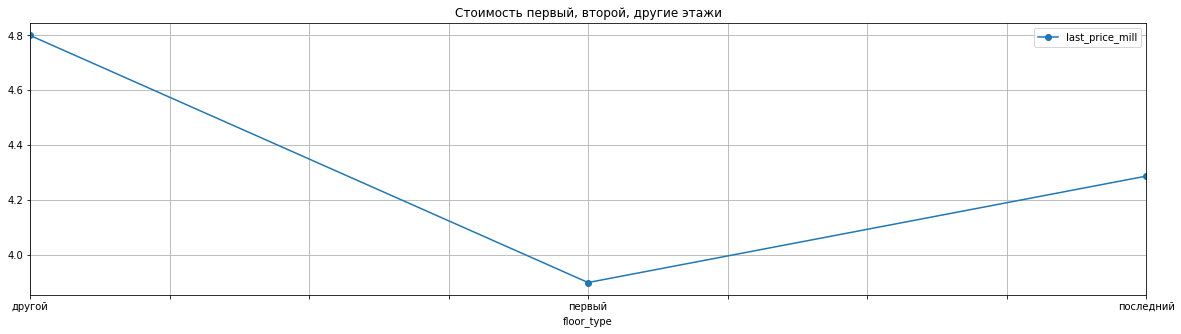

In [46]:
floor = data.query('last_price < 50000000')
floor['last_price_mill'] = floor['last_price'] / 1000000

floor_pivot = floor.pivot_table(index='floor_type', values='last_price_mill', aggfunc='median').reset_index()
display(floor_pivot.head())
floor_pivot.plot(x='floor_type', y='last_price_mill', style='o-', xlim=(0, 2),  grid=True, figsize=(20, 5))
plt.title('Стоимость первый, второй, другие этажи')



Первый и последний этажи имеют иную стоимость от других. Первый дешевле, последний дороже - все остальные еще дороже.

/tmp/ipykernel_48/4230245090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  publication_data['last_price_mill'] = publication_data['last_price'] / 1000000


,publication_day,last_price_mill
0,воскресенье,4.54
1,вторник,4.7
2,понедельник,4.6225
3,пятница,4.55
4,середина,4.7
5,суббота,4.5
6,четверг,4.6


Text(0.5, 1.0, 'Цена - день подачи объявления - зависимость')

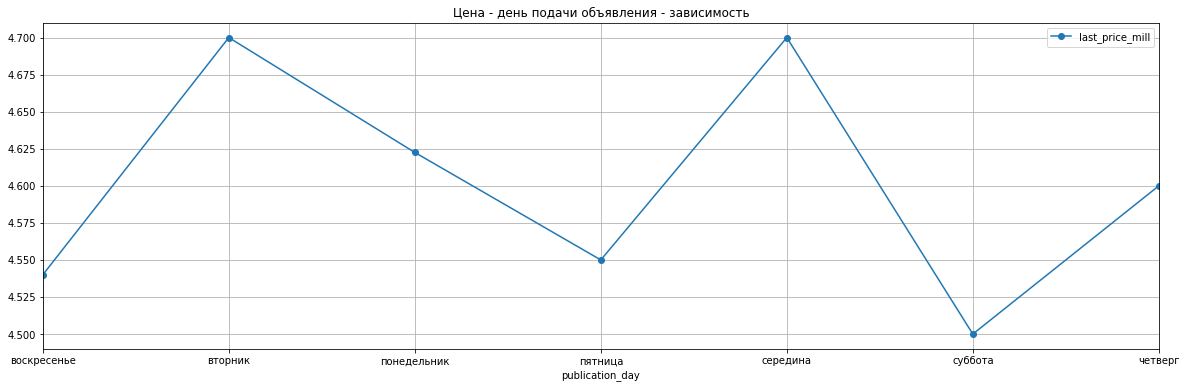

In [47]:
publication_data = data.query('last_price < 50000000')
publication_data['last_price_mill'] = publication_data['last_price'] / 1000000

publication_data_pivot_table = publication_data.pivot_table(index='publication_day', values='last_price_mill', aggfunc='median').reset_index()
display(publication_data_pivot_table.head(20))
publication_data_pivot_table.plot(x='publication_day', y='last_price_mill', style='o-', xlim=(0, 6),  grid=True, figsize=(20, 6))
plt.title('Цена - день подачи объявления - зависимость')


Зависимостьи между ценой квартирыу и днем, в который было оформленно объявление есть, но в диапазоне около 200тр. На " отрезке" общей стоимости квартиры это не является значительным фактором. 

/tmp/ipykernel_48/1918611848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month['last_price_mill'] = month['last_price'] / 1000000


,publication_month,last_price_mill
0,April,4.78
1,August,4.55
2,December,4.65
3,February,4.65
4,January,4.6
5,July,4.6
6,June,4.4
7,March,4.65
8,May,4.5
9,November,4.68


Text(0.5, 1.0, 'Цена - месяц подачи объявления - зависимость')

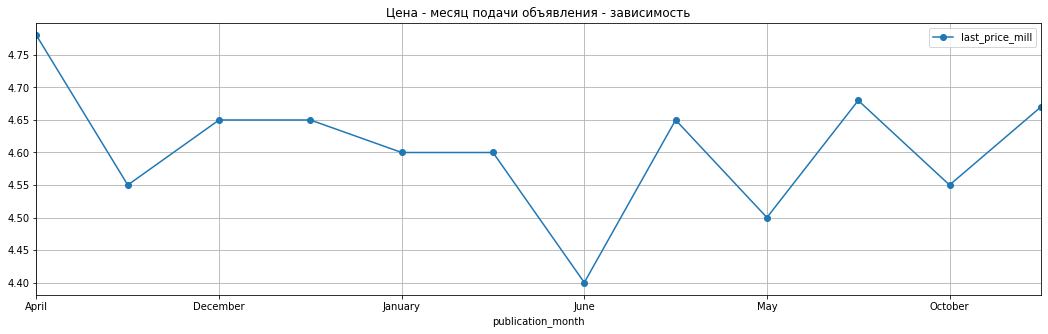

In [49]:
month = data.query('last_price < 50000000')
month['last_price_mill'] = month['last_price'] / 1000000

month_pivot_table = month.pivot_table(index='publication_month', values='last_price_mill', aggfunc='median').reset_index()
display(month_pivot_table.head(12))
month_pivot_table.plot(x='publication_month', y='last_price_mill', style='o-', xlim=(0, 11),  grid=True, figsize=(18, 5))
plt.title('Цена - месяц подачи объявления - зависимость')

По месяцам, в которые оформли объявления диапазон корреляци с ценой примерно 350тр. Для общих показателей  эта цифра вряд ли имеет значение, тем более это медианна. 

/tmp/ipykernel_48/508989473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year['last_price_mill'] = year['last_price'] / 1000000


,publication_year,last_price_mill
0,2014,7.5
1,2015,5.25
2,2016,4.5
3,2017,4.5
4,2018,4.55
5,2019,5.0


Text(0.5, 1.0, 'Цена - год подачи объявления - зависимость')

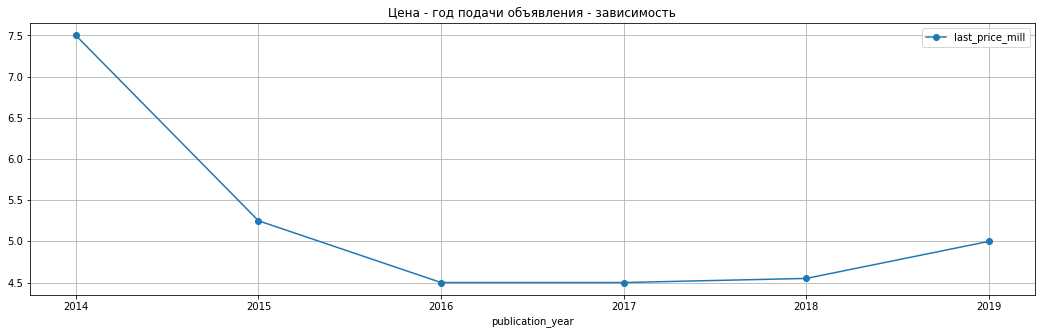

In [50]:
year = data.query('last_price < 50000000')

year['last_price_mill'] = year['last_price'] / 1000000

year_pivot_table = year.pivot_table(index='publication_year', values='last_price_mill', aggfunc='median').reset_index()
display(year_pivot_table.head(10))
year_pivot_table.plot(x='publication_year', y='last_price_mill', style='o-', grid=True, figsize=(18, 5))
plt.title('Цена - год подачи объявления - зависимость')


Заметна зависимость цены от года объявления. Снижение с 2014 до 2018- далее рост.

In [35]:
data_pivot = pd.pivot_table(
    data, 
    index='locality_name', 
    values=['cost_of_square_meter', 'last_price'],
    aggfunc={'cost_of_square_meter': 'median', 'last_price': 'count'}
)
data_pivot = data_pivot.reset_index()
data_pivot.sort_values(['last_price'], ascending=False).head(10)

,locality_name,cost_of_square_meter,last_price
222,санкт-петербург,104667.0,15617
146,мурино,86175.0,588
105,кудрово,95762.0,471
297,шушары,76876.0,440
34,всеволожск,65789.0,395
201,пушкин,99865.5,364
88,колпино,74725.0,337
169,парголово,91642.0,327
42,гатчина,67924.0,305
35,выборг,58307.0,233


Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.

/tmp/ipykernel_48/2596601590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb['cityCenters_nearest_(km)'] = spb['cityCenters_nearest_(km)'].fillna(0).astype(int)
/tmp/ipykernel_48/2596601590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb['last_price_mill'] = spb['last_price'] / 1000000


Text(0.5, 1.0, 'Зависимость цены от центра')

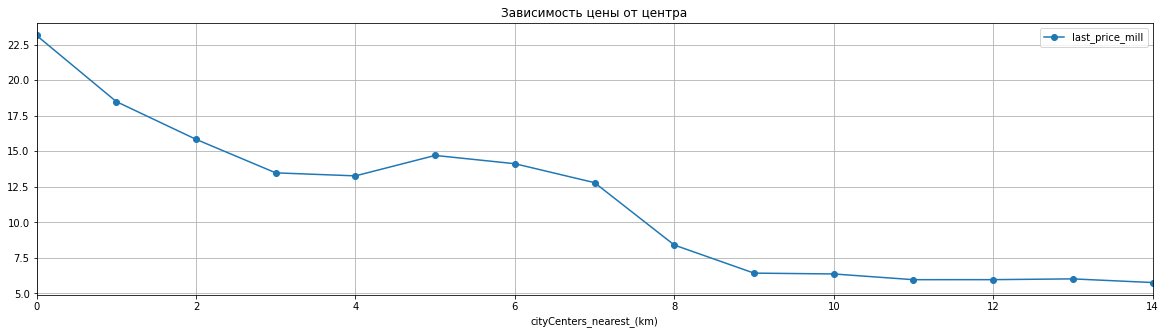

In [51]:
spb = data.query('locality_name == "санкт-петербург" and cityCenters_nearest < 15000')
spb['cityCenters_nearest_(km)'] = spb['cityCenters_nearest_(km)'].fillna(0).astype(int)
spb['last_price_mill'] = spb['last_price'] / 1000000

spb_pivot = spb.pivot_table(index='cityCenters_nearest_(km)', values='last_price_mill')
spb_pivot = spb_pivot.reset_index()
spb_pivot.plot(x='cityCenters_nearest_(km)', y='last_price_mill', style='o-', xlim=(0, 14),  grid=True, figsize=(20, 5))
plt.title('Зависимость цены от центра')


Срез по СПБ. Вычислена средняя стоимость 1 км. Радиус 15 км от центра - в нем большая часть объявлений. Визуально заметно снижение цены при удалении от центр.

Вывод.(Все очень закономерно)))

Стоимость квартир зависит
во превых от: 
  общей площади
  удаленности от центра города
  от кол-ва комнат
во вторых от:
  от площади жилой 
  от площади кухни
  от высоты потолков
Из статистических выводов стоит заметить, что наиболее популярными по числу объявлений являются квартиры  от 30 до 60 кв.м 
Кол-во комнат от 2 до 4. Стоимости от 2.5 до  6 млн. Дни, в которые были выгружены объявления - в 2 раза чаще это в будние, скорее всего в рабочее время. Месяцы наиболее щедрые на объявления это весенние. Проджаются квартиры наболее часто в течкении первого полугодия. Наибольшее кол-во их до 1 8км удаленности от центра. 

  
  

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод